<a href="https://colab.research.google.com/github/erickcori/RL-ETAR-BSM1/blob/main/notebooks/04_resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

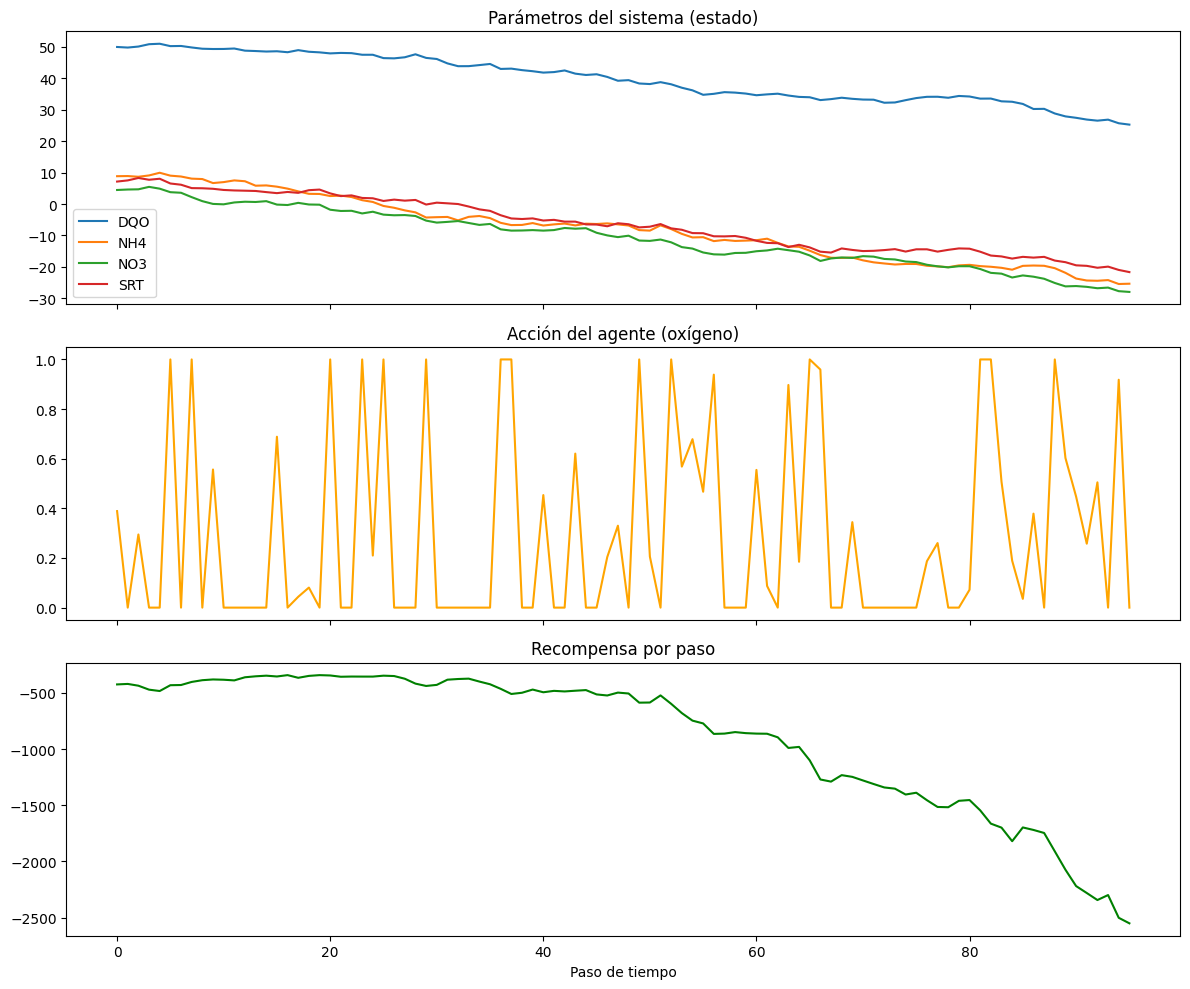

In [3]:
# 🔧 Instalar librerías si es necesario
!pip install stable-baselines3 matplotlib -q

# 📚 Imports
import gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from gym import spaces

# 🧪 Entorno simulado (misma clase del entrenamiento)
class BSM1Env(gym.Env):
    def __init__(self):
        super(BSM1Env, self).__init__()
        self.action_space = spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32)
        self.observation_space = spaces.Box(low=0, high=100, shape=(4,), dtype=np.float32)
        self.state = np.array([50.0, 10.0, 5.0, 8.0])
        self.t = 0

    def reset(self):
        self.state = np.array([50.0, 10.0, 5.0, 8.0])
        self.t = 0
        return self.state

    def step(self, action):
        oxigeno = action[0]
        self.state += np.random.normal(0, 0.5, size=self.state.shape) - oxigeno
        reward = -np.sum((self.state - np.array([30, 5, 2, 5]))**2)
        self.t += 1
        done = self.t >= 96
        return self.state, reward, done, {}

# 🚀 Cargar modelo entrenado
env = BSM1Env()
model = PPO.load("ppo_bsm1_agent")

# 🧾 Simular 96 pasos y guardar todo
obs = env.reset()
observaciones = []
acciones = []
recompensas = []

for t in range(96):  # 4 días, si cada paso es 1 hora
    action, _ = model.predict(obs)
    obs, reward, done, _ = env.step(action)

    observaciones.append(obs.copy())
    acciones.append(action[0])
    recompensas.append(reward)

    if done:
        break

observaciones = np.array(observaciones)

# 📈 Graficar resultados
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

axs[0].plot(observaciones[:, 0], label='DQO')
axs[0].plot(observaciones[:, 1], label='NH4')
axs[0].plot(observaciones[:, 2], label='NO3')
axs[0].plot(observaciones[:, 3], label='SRT')
axs[0].set_title("Parámetros del sistema (estado)")
axs[0].legend()

axs[1].plot(acciones, color='orange')
axs[1].set_title("Acción del agente (oxígeno)")

axs[2].plot(recompensas, color='green')
axs[2].set_title("Recompensa por paso")

plt.xlabel("Paso de tiempo")
plt.tight_layout()
plt.show()

In [2]:
model = PPO.load("ppo_bsm1_agent.zip")